In [1]:
import pandas as pd
import math

df = pd.read_csv("bank_data.csv")
df

,id,x_coordinate,y_coordinate,money,time (hr)
0,0,2.851925,1.201712,29700,0.273403
1,1,4.150372,-2.654334,6500,0.064040
2,2,-1.494092,-1.230419,89400,0.127458
3,3,1.271326,-0.088520,96100,1.315029
4,4,2.471113,-0.592810,41100,0.164393
...,...,...,...,...,...
9995,9995,-2.472127,4.787304,2100,0.494904
9996,9996,1.034968,-4.321240,54900,0.492866
9997,9997,-0.512720,-2.949173,32200,0.933033
9998,9998,2.626841,-3.482923,5100,0.551312


In [60]:
def bank_robbery(df):
    bank_list = []
    time_left = 24
    score = 0
    speed = 30
    df = df.rename(columns={"time (hr)": "time_hr"})
    df['money_hour'] = df['money']/df['time_hr']
    df10m = df[(df.money_hour > 10_000_000) & (df.money > 10_000)]
    df5m = df.loc[(df['money_hour'] > 5_000_000) & (df['money_hour'] < 10_000_000) & (df['money'] > 50_000)]
    df0m = df.loc[(df['money_hour'] > 500_000) & (df['money_hour'] < 5_000_000) & (df['money'] > 60_000)]
    dfk = df.loc[(df['money_hour'] > 100_000) & (df['money_hour'] < 500_000) & 
                         (df['time_hr'] < 0.2) & (df['money'] > 85_000)]
    df_new = df10m.append(df5m)
    df_new = df_new.append(df0m)
    df_new = df_new.append(dfk)
    df_new = df_new.reset_index(drop=True)

    for index, row in df_new.iloc[:].iterrows():
        if time_left - df_new["time_hr"].iloc[-1] < 0.25:
            break
        current_position = (df_new["x_coordinate"].iloc[index], df_new["y_coordinate"].iloc[index])
        new_position = (df_new["x_coordinate"].iloc[(index + 1)], df_new["y_coordinate"].iloc[(index + 1)])
        dist_travelled = math.dist(current_position, new_position)
        travel_time = dist_travelled/speed
        rob_time = df_new["time_hr"].iloc[index]
        time_left -= travel_time
        time_left -= rob_time
        money_collected = df_new["money"].iloc[index]
        score += money_collected
        bank_id = df_new["id"].iloc[index]
        bank_list.append(bank_id)

    dist_0 = math.dist((new_position),(0,0))
    time_left -= (dist_0 / speed)
    
    return score, bank_list

bank_robbery(df)

(7199500,
 [3613,
  3803,
  4499,
  4757,
  5933,
  6528,
  7343,
  9195,
  9241,
  9546,
  9583,
  433,
  487,
  3466,
  4762,
  5135,
  6097,
  7544,
  7560,
  8436,
  8469,
  8562,
  2,
  299,
  488,
  517,
  557,
  757,
  781,
  1372,
  1447,
  1455,
  1599,
  1684,
  2028,
  2226,
  2346,
  2458,
  2590,
  3026,
  3193,
  3297,
  3516,
  4234,
  4287,
  4492,
  4494,
  4610,
  4627,
  4696,
  4742,
  4789,
  4807,
  4906,
  4983,
  5155,
  5166,
  5295,
  5296,
  5356,
  5381,
  5610,
  5622,
  5944,
  6104,
  6156,
  6169,
  6216,
  6281,
  6317,
  6468,
  6478,
  6535,
  6740,
  6934,
  7064,
  7074,
  7087,
  7265,
  7494,
  7531,
  7583,
  7595,
  7625,
  7665,
  7689,
  7769,
  7772,
  8125,
  8231,
  8287,
  8288,
  8525])

In [64]:
import math


def distance(x1, y1, x2, y2):
    return math.hypot(x2 - x1, y2 - y1)

def check_solution(travel_list, df, speed=30.):
    """
    Check a bank robber algorithm solution
    
    input:
    ------
    travel_list: a list of integers
        Your solution to the bank robber problem
        Bank IDs are row indeces into the df passed
    df: pd.DataFrame
        The algorithm input formatted dataframe 
        (id,x_coordinate,y_coordinate,money,time (hr))
    speed: float
        The km/h speed of travel
    """
    t_remaining = 24.
    score = 0.
    assert len(travel_list) == len(set(travel_list)), (
        "Your travel list must have unique IDs!"
    )
    prev = travel_list[0]
    for e in travel_list:
        row = df.iloc[e]
        score += row['money']
        t_remaining -= row['time_hr']
        dist = distance(
            row['x_coordinate'], row['y_coordinate'],
            df.iloc[prev]['x_coordinate'],
            df.iloc[prev]['y_coordinate'],
        )
        t_remaining -= dist / speed
        prev = e
    assert t_remaining >= 0, (
        f"Used more than 24h! Time left: {t_remaining}"
    )
    # still gotta get to (0, 0)
    dist = distance(row['x_coordinate'],row['y_coordinate'],0,0)
    final_t = t_remaining - (dist / speed)
    assert final_t >= 0, (
        f"Not enough time to get to helicopter!\n"
        f"Time left after last bank: {t_remaining}\n"
        f"Distance to (0,0) helipad: {dist}\n"
    )
    print(f"Time Remaining: {final_t}")
    return score

check_solution(bank_list, df, speed=30.)

Time Remaining: 0.2976614237266906


7199500.0

93 banks robbed for a total of 7199500 dollars


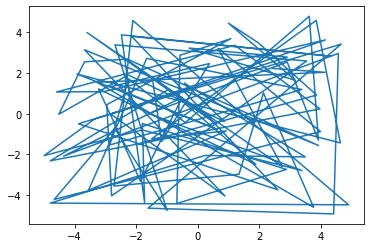

In [65]:
import matplotlib.pyplot as plt
def verify(travel_list, df):
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(travel_list)} banks robbed for a total of {sum(df.money[travel_list])} dollars')
    
verify(bank_list, df)